In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

In [3]:
!pip install xgboost

In [4]:
!pip install catboost

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [6]:
!pip install ipywidgets

In [7]:
import pandas as pd
import os

# Get the path to the directory where the notebook is located
notebook_dir = os.getcwd()

# Join the directory path with the filename
data_path = os.path.join(notebook_dir, "Crop_recommendation.csv")

# Now load the CSV
try:
    df = pd.read_csv(data_path)
    print("File loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"ERROR: Could not find '{data_path}'.")
    print("Please ensure 'Crop_recommendation.csv' is in the same folder as this notebook.")

File loaded successfully!
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [8]:
print("Dataset shape:", df.shape)
print("\nSample rows:\n", df.head())

Dataset shape: (2200, 8)

Sample rows:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [9]:
X = df.drop(columns=['label'])
y = df['label']

In [10]:
# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
classes = le.classes_

In [11]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2,
                                                    random_state=42, stratify=y_enc)
print("\nShapes -> X:", X.shape, "X_train:", X_train.shape, "X_test:", X_test.shape)


Shapes -> X: (2200, 7) X_train: (1760, 7) X_test: (440, 7)


In [13]:
# 3. Define models
# ---------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}



In [14]:
# 4. Train & Evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} => Accuracy: {acc:.4f}")


Training Logistic Regression ...
Logistic Regression => Accuracy: 0.9727

Training Decision Tree ...
Decision Tree => Accuracy: 0.9795

Training Random Forest ...
Random Forest => Accuracy: 0.9955

Training KNN ...
KNN => Accuracy: 0.9795

Training SVM ...
SVM => Accuracy: 0.9841

Training XGBoost ...
XGBoost => Accuracy: 0.9932

Training AdaBoost ...
AdaBoost => Accuracy: 0.2273

Training CatBoost ...
CatBoost => Accuracy: 0.9977


In [15]:
res_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
}).sort_values(by='Accuracy', ascending=False)

print("\n--- Model Performance ---\n", res_df)


--- Model Performance ---
                  Model  Accuracy
7             CatBoost  0.997727
2        Random Forest  0.995455
5              XGBoost  0.993182
4                  SVM  0.984091
1        Decision Tree  0.979545
3                  KNN  0.979545
0  Logistic Regression  0.972727
6             AdaBoost  0.227273


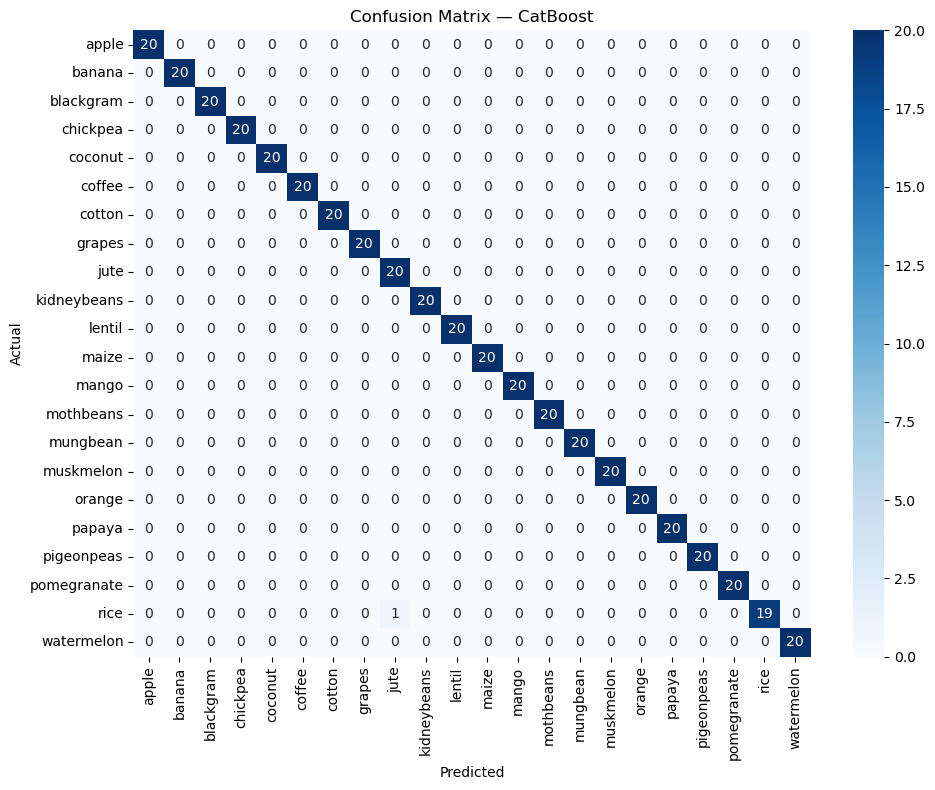

In [16]:
# 5. Confusion Matrix for Best Model
best_model_name = res_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# Input order: [N, P, K, temperature, humidity, ph, rainfall]
sample_input = np.array([90, 42, 43, 20.8, 82, 6.5, 202]).reshape(1, -1)
sample_scaled = scaler.transform(sample_input)
pred_label_enc = best_model.predict(sample_scaled)
pred_crop = le.inverse_transform(pred_label_enc)
print("\nRecommended crop for given soil & climate conditions:", pred_crop[0])


Recommended crop for given soil & climate conditions: rice


In [18]:
pip install flask flask-cors


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import time
from threading import Thread

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from flask import Flask, request, jsonify
from flask_cors import CORS

# ===== STEP 1: Load CSV data =====
data_path = "Crop_recommendation.csv"
try:
    df = pd.read_csv(data_path)
    print(" CSV file loaded successfully!")
except FileNotFoundError:
    print(f"ERROR: '{data_path}' not found. Please place it in the same directory.")
    exit()

# ===== STEP 2: Preprocess data and train model =====
X = df.drop(columns=['label'])
y = df['label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, _, y_train, _ = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(" Model trained successfully.")

# ===== STEP 3: Set up Flask API =====
app = Flask(__name__)
CORS(app)

@app.route('/predict', methods=['POST'])
def predict():
    """
    API endpoint to predict recommended crop.
    Expects JSON with keys: N, P, K, temperature, humidity, ph, rainfall
    """
    try:
        data = request.get_json()
        required_keys = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

        # Validate JSON input
        for key in required_keys:
            if key not in data:
                return jsonify({'error': f"Missing key: '{key}'"}), 400

        # Prepare input for prediction
        user_input = np.array([
            data['N'], data['P'], data['K'],
            data['temperature'], data['humidity'],
            data['ph'], data['rainfall']
        ]).reshape(1, -1)

        scaled_input = scaler.transform(user_input)
        prediction_encoded = model.predict(scaled_input)
        recommended_crop = le.inverse_transform(prediction_encoded)[0]

        return jsonify({'recommended_crop': recommended_crop})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

# ===== RUN FLASK IN THREAD =====
def run_flask_app():
    app.run(port=5000, debug=True, use_reloader=False)

if __name__ == '__main__':
    print("Starting Flask API at http://127.0.0.1:5000/")
    flask_thread = Thread(target=run_flask_app, daemon=True)
    flask_thread.start()

    # Keep server alive
    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        print("\n Stopping Flask API...")


 CSV file loaded successfully!
 Model trained successfully.
Starting Flask API at http://127.0.0.1:5000/
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Sep/2025 19:18:13] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [18/Sep/2025 19:18:13] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [18/Sep/2025 19:30:53] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [18/Sep/2025 19:30:53] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [18/Sep/2025 19:33:17] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [18/Sep/2025 19:33:17] "POST /predict HTTP/1.1" 200 -


## 